## GraphPro

A library for protein graph learning

In [1]:
import nglview as nv
import MDAnalysis as mda

Using an Adk simulation from Alessandro

In [2]:
pdb_file = '/Users/pegerto.fernandez/brunel/data/MD05_ADK_protein_fit_tiny.pdb'
trajectory = '/Users/pegerto.fernandez/brunel/data/MD05_ADK_protein_fit_tiny.xtc'

u = mda.Universe(pdb_file, trajectory)

In [3]:
view = nv.show_mdanalysis(u)
view.add_surface(selection="protein", opacity=0.8)

view

NGLWidget(max_frame=99)

## Installing graphpro

In [4]:
!pip install graphpro


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import graphpro as gp

from graphpro.graphgen import ContactMap

graph_gen = gp.md_analisys(u)
G = graph_gen.generate(ContactMap(cutoff=8))

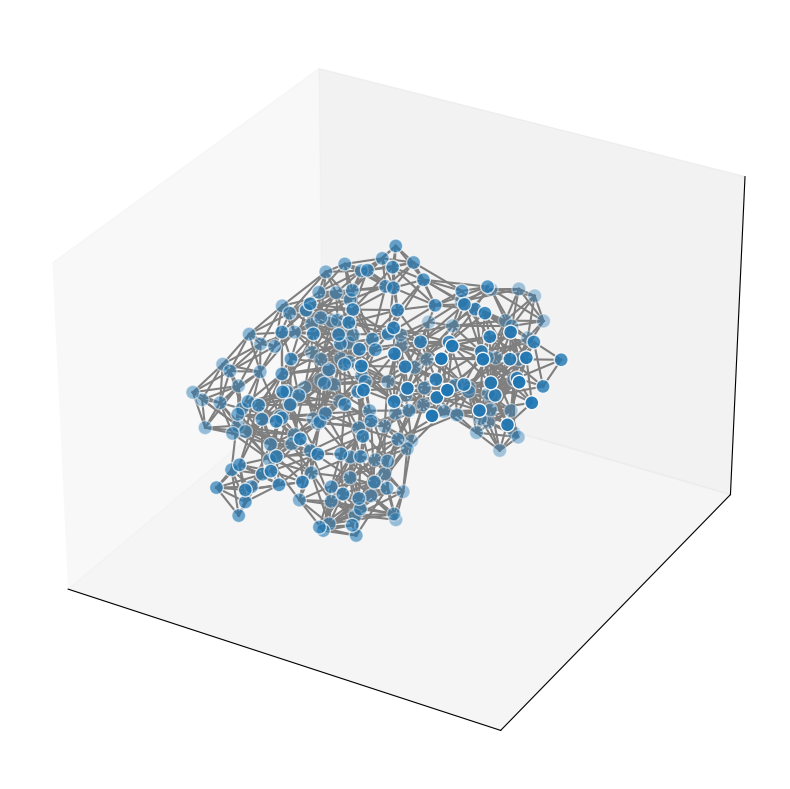

In [6]:
G.plot()

Text(0.5, 0, 'Algorithm step')

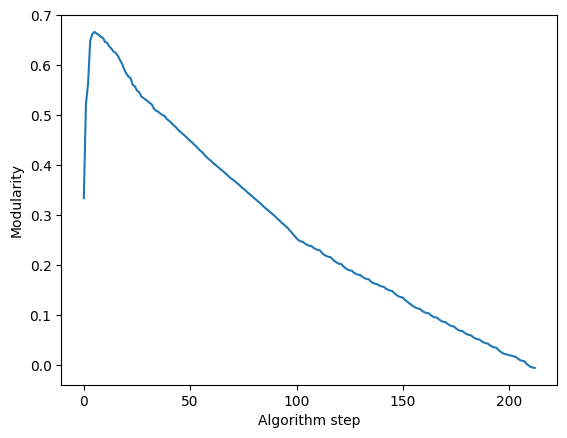

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

communites = G.communities()
modularity = list(map(lambda x: x[0], communites))
plt.plot(modularity)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')


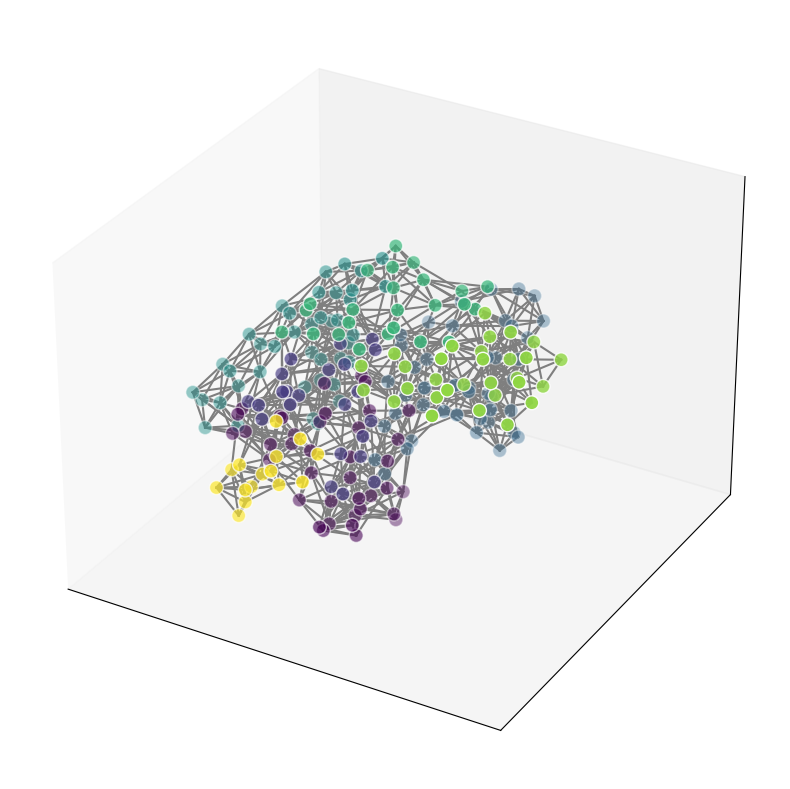

In [8]:
high_modularity_community = communites[5][1]

G.plot(communities=high_modularity_community)